# TP4 - exercice 3 : glmnet & digits

Dans cet exercice nous allons illustrer l'utilisation de **glmnet** et des méthodes pénalisés parcimonieuses pour la classification mutliclasse.

Pour cela nous travaillerons sur le jeu de données **ZIP** que l'on peut télécharger [ici](https://web.stanford.edu/~hastie/ElemStatLearn/data.html). 
Comme les jeu **digits** et **MNIST**, ce jeu de données contient des imagettes de caractères manuscrits (des chiffres entre 0 et 1), mais avec une taille intermédiaire. Les images sont en effet de taille 16x16 (au lieu de 8x8 ou 28x28), ce qui réduit le temps nécessaire pour réaliser les analyses.

Le jeu de données se constitue d'un ensemble d'apprentissage et d'un ensemble de test, stockés dans les fichiers **zip.train** et **zip.test**. Chaque ligne de ces fichiers contient une instance et contient un chiffre entre 0 et 9 dans la 1ère colonne donnant la catégorie, puis les 256 valeurs définissant l'image.

## Question 1. Charger le jeu de données et représenter quelques images avec le code ci-dessous.
* NB: pour le TP on réduira même la taille du jeu d'apprentissage par 2 pour que l'exécution soit plus rapide.

In [1]:
# generic imports #
#-----------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

size of training data = 7291 x 256
size of test data = 2007 x 256


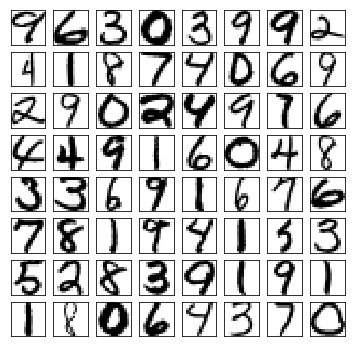

In [2]:
# read training data #
#--------------------#
data_train = np.genfromtxt('datasets/zip-database/zip.train')
y_train = data_train[:,0]
X_train = data_train[:,1:]
# read test data #
#----------------#
data_test = np.genfromtxt('datasets/zip-database/zip.test')
y_test = data_test[:,0]
X_test = data_test[:,1:]
print('size of training data = %d x %d' % (X_train.shape[0],X_train.shape[1]))
print('size of test data = %d x %d' % (X_test.shape[0],X_test.shape[1]))
# show a few figures #
#--------------------#
# pick samples
ind_sple = np.random.choice(len(y_train), size = 8*8, replace = False)
# init plot
plt.figure(figsize=(6,6))
# plot images
plt_cptr=0
for i in range(8*8):
    plt_cptr = plt_cptr+1
    plt.subplot(8,8,plt_cptr)
    plt.imshow(np.reshape(X_train[ind_sple[i],:],(16,16)), cmap='binary')
    plt.xticks([])
    plt.yticks([])
plt.show()
      

In [3]:
############################################
##### REDUCE SIZE OF TRAINING DATASET ######
############################################
ind_sple = np.random.choice(len(y_train), size = 3500, replace = False)
X_train = X_train[ind_sple,:]
y_train = y_train[ind_sple]
############################################

## Question 2. Reproduire l'expérience réalisée dans l'expercice 4 du TP2 visant à reconnaître le $0$ des autres chiffres par un modèle "Random Forest" avec le code ci-dessous.

In [4]:
# define a 0-vs-other variable #
#------------------------------#
# for train
y_train_0 = np.zeros(y_train.shape)
y_train_0[y_train == 0] = 1
# for test
y_test_0 = np.zeros(y_test.shape)
y_test_0[y_test == 0] = 1

In [5]:
# fit random forest model #
#-------------------------#
from sklearn.ensemble import  RandomForestClassifier
# instantiate model
rf = RandomForestClassifier(n_estimators = 500)
# learn model
rf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
# evaluate model #
#----------------#
y_pred_rf = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))

[[ 23 336   0   0   0   0   0   0   0   0]
 [264   0   0   0   0   0   0   0   0   0]
 [198   0   0   0   0   0   0   0   0   0]
 [166   0   0   0   0   0   0   0   0   0]
 [200   0   0   0   0   0   0   0   0   0]
 [158   2   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [166   0   0   0   0   0   0   0   0   0]
 [177   0   0   0   0   0   0   0   0   0]]


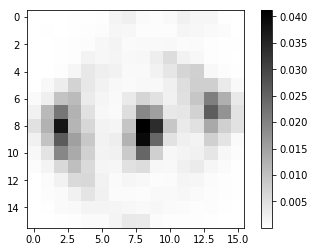

In [7]:
# show variable importance #
#--------------------------#
var_imp = rf.feature_importances_
var_imp_mat = np.reshape(var_imp, (16,16))
plt.imshow(var_imp_mat, cmap ='binary')
plt.colorbar()
plt.show()

## Question 3. Effectuer la même analyse en considérant un modèle de régression logistique pénalisé par une norme $L_1$ (lasso), grâce au package *glmnet_python*.
* on optimisera le paramètre de régularisation grâce à la fonction **cvglmnet**.

In [8]:
import glmnet_python
# fit & optimize model #
#----------------------#
from cvglmnet import cvglmnet
cvfit_lasso = cvglmnet(x = X_train, y = y_train_0, family = "binomial", ptype="class")

/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/glmnet_python/cvglmnetPlot.py:82: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Softs/virtualenvPython/piedros/lib/python3.5/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


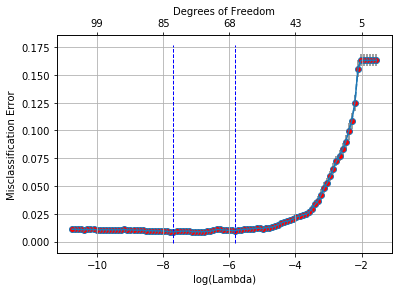

In [9]:
# plot result #
#-------------#
from cvglmnetPlot import cvglmnetPlot
cvglmnetPlot(cvfit_lasso)
plt.show()

In [10]:
# evaluate model #
#----------------#
from cvglmnetPredict import cvglmnetPredict
y_pred_lasso = cvglmnetPredict(cvfit_lasso, newx = X_test, s = 'lambda_1se', ptype = 'class')
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lasso))

[[ 21 338   0   0   0   0   0   0   0   0]
 [264   0   0   0   0   0   0   0   0   0]
 [195   3   0   0   0   0   0   0   0   0]
 [163   3   0   0   0   0   0   0   0   0]
 [199   1   0   0   0   0   0   0   0   0]
 [156   4   0   0   0   0   0   0   0   0]
 [170   0   0   0   0   0   0   0   0   0]
 [146   1   0   0   0   0   0   0   0   0]
 [162   4   0   0   0   0   0   0   0   0]
 [177   0   0   0   0   0   0   0   0   0]]


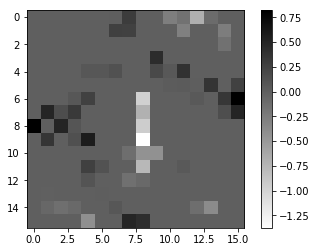

In [11]:
# extract best coefficients #
#---------------------------#
# extract coefficients from cv fit object
from cvglmnetCoef import cvglmnetCoef
beta = cvglmnetCoef(cvfit_lasso, s = 'lambda_1se')
# format as a matrix
beta_mat = np.reshape(beta[1:], (16,16)) # NB : discard 1st feature = intercept
# plot
plt.imshow(beta_mat, cmap='binary')
plt.colorbar()
plt.show()

## Question 4. Considérer à présent le problème de classification multiclasse en utilisant un modèle multinomial. L'objectif principal étant de visualiser et comparer les modèles obtenus par différentes pénalités, on appliquera par souci de temps la procédure suivante : 
1. construire globalement le modèle (i.e., sans optimiser le paramêtre de régularisation) via la fonction **glmnet()** (en utilisant l'option $\texttt{family='multinomial'}$
2. évaluer ses performances **sur les jeux d'apprentissage et de test** via la fonction **glmnetPredict()**
3. représenter les performances obtenues le long du chemin de régularisation, **sur les jeux d'apprentissage et de test**.
4. représenter les modèles obtenus pour une "bonne" valeur de lambda : une valeur permettant d'obtenir de bonnes performances de test, tout en restant relativement parcimonieux. La ~40ème valeur de la grille obtenue par défaut devrait être un bon compromis.
### (bien entendu, la bonne manière de faire consisterait à optimiser le paramètre par validation croisée comme précédemment, et vous êtes tout à fait encouragés à réaliser cette analyse "pour de vrai" chez vous.)

## Les modèles obtenus sont-ils toujours interprétables ?

In [12]:
# fit model #
#-----------#
from glmnet import glmnet
fit_multi = glmnet(x = X_train, y = y_train, family = "multinomial")

In [13]:
# get predictions #
#-----------------#
from glmnetPredict import glmnetPredict
preds_train = glmnetPredict(fit_multi, newx = X_train, ptype = 'class')
preds_test = glmnetPredict(fit_multi, newx = X_test, ptype = 'class')

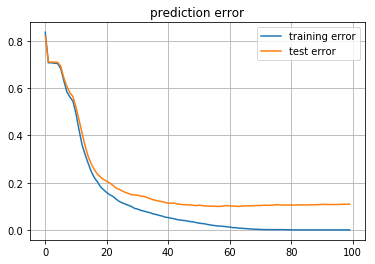

In [14]:
# compute performance along regularization path #
#-----------------------------------------------#
from sklearn.metrics import accuracy_score
n_lambda = preds_train.shape[1]
acc_train = np.zeros( (n_lambda,1) )
acc_test = np.zeros( (n_lambda,1) )

for i in range(n_lambda):
    acc_train[i] = accuracy_score(y_train, preds_train[:,i])
    acc_test[i] = accuracy_score(y_test, preds_test[:,i])

# plot
plt.plot(1-acc_train, label = 'training error')
plt.plot(1-acc_test, label = 'test error')
plt.grid()
plt.legend()
plt.title('prediction error')
plt.show()

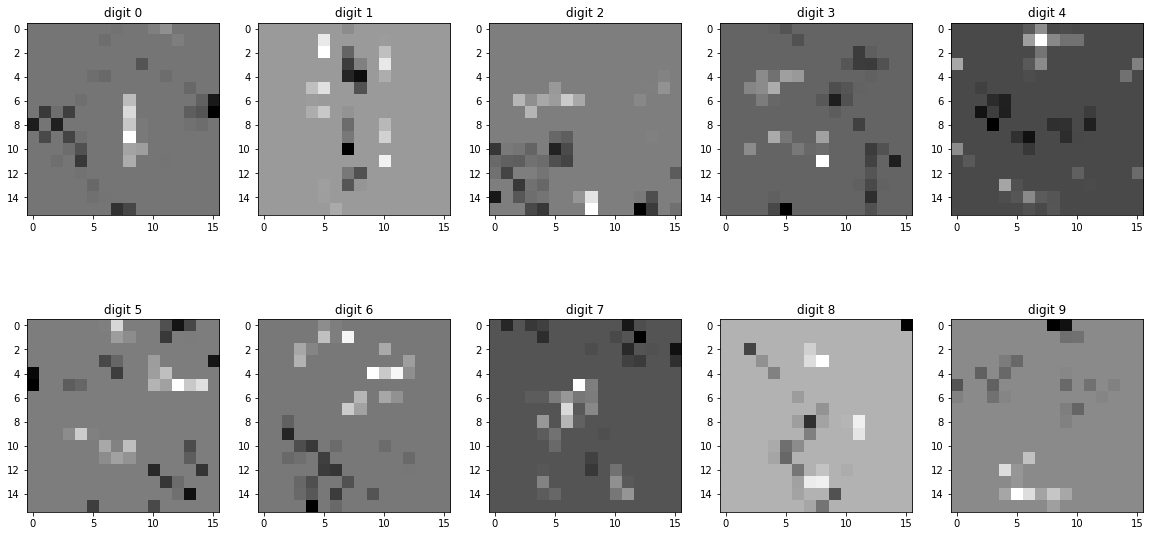

In [15]:
# pick lambda and show model #
#----------------------------#
lambda_index  = 40
plt.figure(figsize = (20,10))
plt_cptr = 0
for i in range(10):
    beta = fit_multi['beta'][i][:,lambda_index]
    beta_mat =  np.reshape(beta, (16,16))
    # plot
    plt_cptr += 1
    plt.subplot(2,5,plt_cptr)
    plt.imshow(beta_mat, cmap='binary')
    plt.title('digit %d' % fit_multi['label'][i])
    
plt.show()

## Question 5. De la même manière, considérer le modèle multinomial pénalisé en norme $L_2$ (ridge) et représenter les modèles obtenus. Sont-ils plus interprétables ?
* là aussi, on se contentera de construire le modèle global, d'évaluer les performances train/test et de choisir une valeur de lambda
* la ~80ème valeur de la grille obtenue par défaut devrait être un bon compromis.

In [16]:
# fit model #
#-----------#
fit_ridge = glmnet(x = X_train, y = y_train, family = "multinomial", alpha = 0)

In [17]:
# get predictions #
#----------------#
from glmnetPredict import glmnetPredict
preds_train_ridge = glmnetPredict(fit_ridge, newx = X_train, ptype = 'class')
preds_test_ridge = glmnetPredict(fit_ridge, newx = X_test, ptype = 'class')

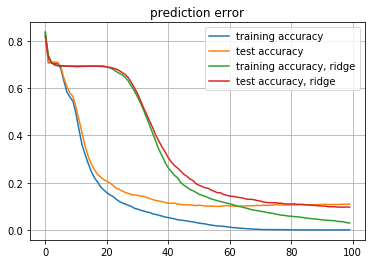

In [18]:
# compute performance along regularization path
from sklearn.metrics import accuracy_score
n_lambda = preds_train_ridge.shape[1]
acc_train_ridge = np.zeros( (n_lambda,1) )
acc_test_ridge = np.zeros( (n_lambda,1) )

for i in range(n_lambda):
    acc_train_ridge[i] = accuracy_score(y_train, preds_train_ridge[:,i])
    acc_test_ridge[i] = accuracy_score(y_test, preds_test_ridge[:,i])

plt.plot(1-acc_train, label = 'training accuracy')
plt.plot(1-acc_test, label = 'test accuracy')
plt.plot(1-acc_train_ridge, label = 'training accuracy, ridge')
plt.plot(1-acc_test_ridge, label = 'test accuracy, ridge')
plt.grid()
plt.legend()
plt.title('prediction error')
plt.show()

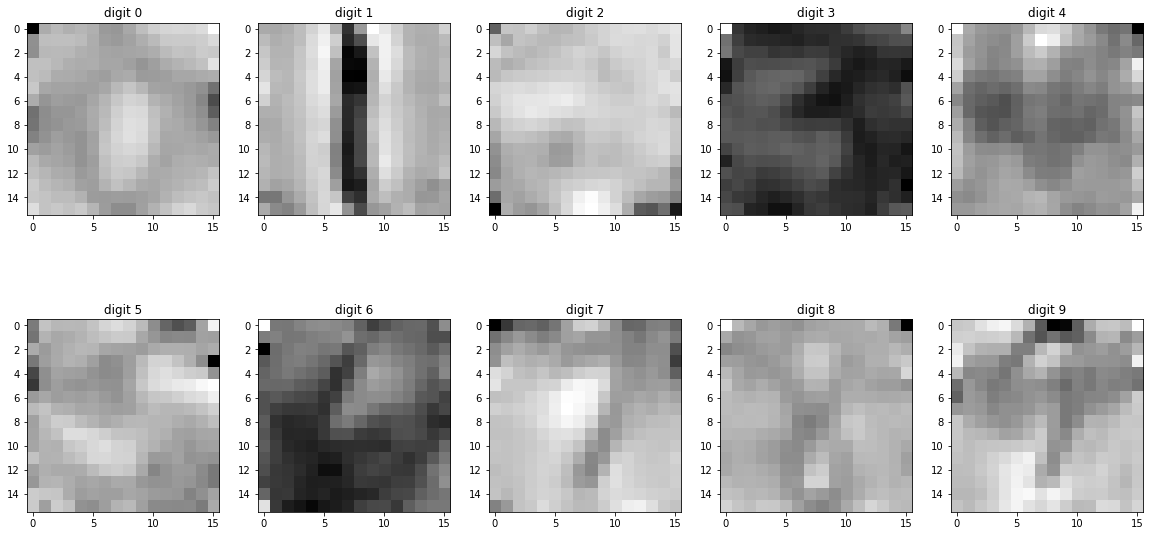

In [19]:
# pick lambda and show model #
#----------------------------#
lambda_index  = 80
plt.figure(figsize = (20,10))
plt_cptr = 0
for i in range(10):
    beta = fit_ridge['beta'][i][:,lambda_index]
    beta_mat =  np.reshape(beta, (16,16))
    # plot
    plt_cptr += 1
    plt.subplot(2,5,plt_cptr)
    plt.imshow(beta_mat, cmap='binary')
    plt.title('digit %d' % fit_multi['label'][i])
    #plt.colorbar()
    
plt.show()

## Question 6. Réaliser la même analyse pour le modèle multinomial "groupé", i.e., pénalisé en group-lasso.
* là aussi, on se contentera de construire le modèle global, d'évaluer les performances train/test et de choisir une valeur de lambda
* la ~40ème valeur de la grille obtenue par défaut devrait être un bon compromis.

In [20]:
# fit model #
fit_gp = glmnet(x = X_train, y = y_train, family = "multinomial", mtype = 'grouped')

In [21]:
# get predictions #
#-----------------#
from glmnetPredict import glmnetPredict
preds_train_gp = glmnetPredict(fit_gp, newx = X_train, ptype = 'class')
preds_test_gp = glmnetPredict(fit_gp, newx = X_test, ptype = 'class')

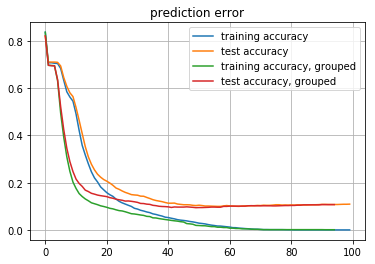

In [22]:
# compute performance along regularization path #
#-----------------------------------------------#
from sklearn.metrics import accuracy_score
n_lambda = preds_train_gp.shape[1]
acc_train_gp = np.zeros( (n_lambda,1) )
acc_test_gp = np.zeros( (n_lambda,1) )

for i in range(n_lambda):
    acc_train_gp[i] = accuracy_score(y_train, preds_train_gp[:,i])
    acc_test_gp[i] = accuracy_score(y_test, preds_test_gp[:,i])

plt.plot(1-acc_train, label = 'training accuracy')
plt.plot(1-acc_test, label = 'test accuracy')
plt.plot(1-acc_train_gp, label = 'training accuracy, grouped')
plt.plot(1-acc_test_gp, label = 'test accuracy, grouped')
plt.grid()
plt.legend()
plt.title('prediction error')
plt.show()

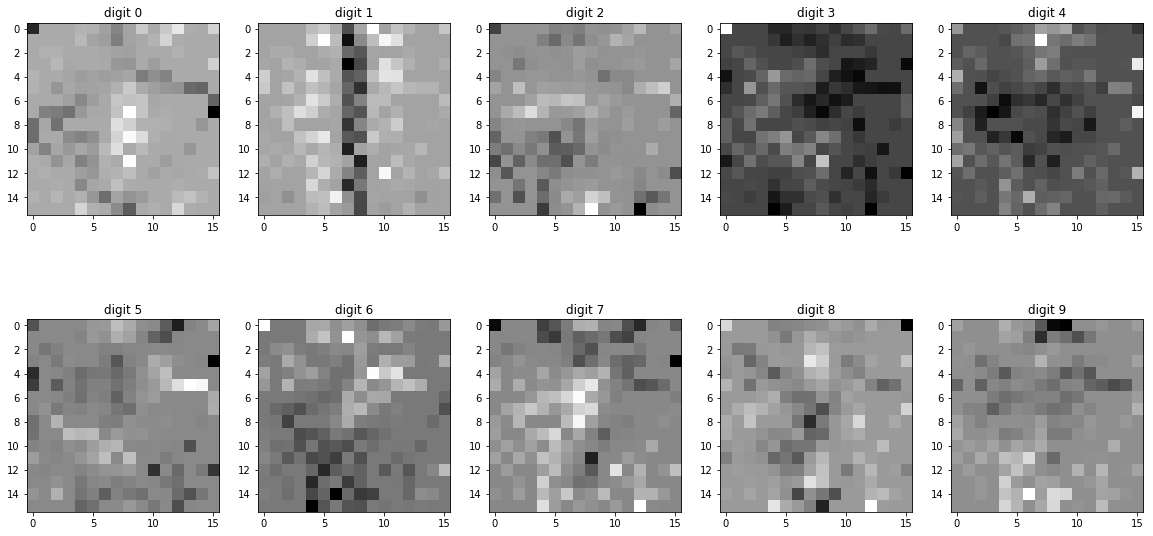

In [23]:
# pick lambda and show model #
#----------------------------#
lambda_index = 40
plt.figure(figsize = (20,10))
plt_cptr = 0
for i in range(10):
    beta = fit_gp['beta'][i][:,lambda_index]
    beta_mat =  np.reshape(beta, (16,16))
    # plot
    plt_cptr += 1
    plt.subplot(2,5,plt_cptr)
    plt.imshow(beta_mat, cmap='binary')
    plt.title('digit %d' % fit_multi['label'][i])
    #plt.colorbar()
    
plt.show()

## Question 7. Enfin, visualiser les matrices de coefficients retenues, et compter le nombre total de variables retenues dans au moins un des modèles.
* on conservera les valeurs de lambda retenues précédemment.

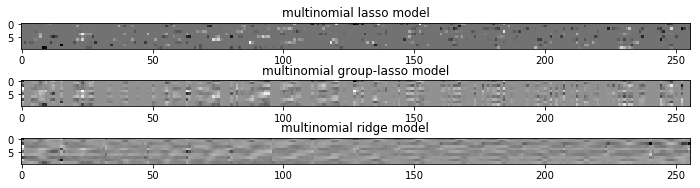

In [24]:
B = np.zeros((10,256))
B_gp = np.zeros((10,256))
B_ridge = np.zeros((10,256))
lambda_index = 40
lambda_index_ridge = 80
for i in range(10):
    B[i,:] = fit_multi['beta'][i][:,lambda_index]
    B_gp[i,:] = fit_gp['beta'][i][:,lambda_index]
    B_ridge[i,:] = fit_ridge['beta'][i][:,lambda_index_ridge]
    
plt.figure(figsize = (12,3))
plt.subplot(3,1,1)
plt.imshow(B, cmap = 'binary')
#plt.colorbar()
plt.title('multinomial lasso model')
plt.subplot(3,1,2)
plt.imshow(B_gp, cmap = 'binary')
#plt.colorbar()
plt.title('multinomial group-lasso model')
plt.subplot(3,1,3)
plt.imshow(B_ridge, cmap = 'binary')
#plt.colorbar()
plt.title('multinomial ridge model')
plt.show()

In [25]:
# count number of positive variavbles in at least a model #
#---------------------------------------------------------#
# extract maximum (absolute) value of variable
vmax_multi = np.max(abs(B), axis = 0)
vmax_gp = np.max(abs(B_gp), axis = 0)
vmax_ridge = np.max(abs(B_ridge), axis = 0)
# count  positive ones
npos_multi = np.sum(vmax_multi > 0)
npos_gp = np.sum(vmax_gp > 0)
npos_ridge = np.sum(vmax_ridge > 0)

print('*** number of positive coefficients : lasso = %d , gp-lasso = %d , ridge = %d' % (npos_multi, npos_gp, npos_ridge))

*** number of positive coefficients : lasso = 198 , gp-lasso = 172 , ridge = 256
